In [1]:
import pandas as pd
import numpy as np
import lmfit
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
df = pd.read_csv(url, error_bad_lines=False)

colormap = [[0, 0, 0],  # black
                [230, 159, 0],  # orange
                [86, 180, 233],  # sky blue
                [0, 158, 115],  # bluish green
                [240, 228, 66],  # yellow
                [0, 114, 178],  # blue
                [213, 94, 0],  # vermillion
                [204, 121, 167],# reddish purple
                [255, 255, 255]]  
#colormap = [[c[0],c[1],c[2],0.0] for c in colormap]
cp = (['#%02x%02x%02x' % (c[0],c[1],c[2]) for c in colormap])
mpl.rcParams['figure.dpi']= 300

/home/weberam2/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


Text(0.5, 0, 'days from today (negative: past)')

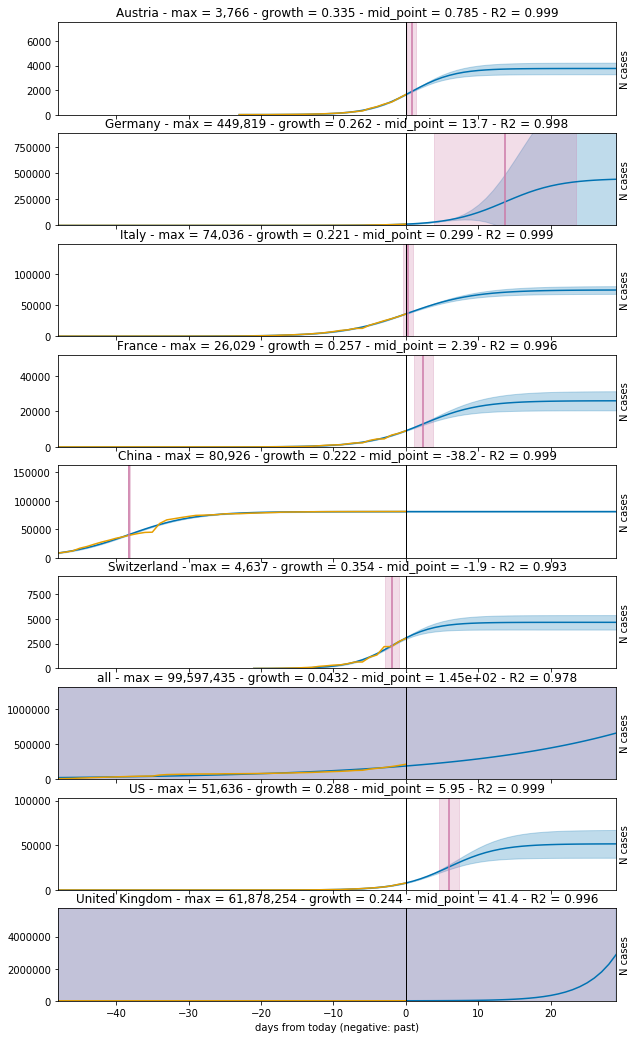

In [7]:
countries = ['Austria','Germany','Italy','France','China','Switzerland','all','US','United Kingdom']

fig,ax = plt.subplots(len(countries),1,sharex='all')
fig.set_size_inches(10,2*len(countries), forward=True)
for i,country in enumerate(countries):
    if country=='all':
        values = df.sum().values[4:]
    else:
        values = df[df['Country/Region']==country].sum().values[4:]
    if np.any(np.diff(values>1)):
        start = np.where(np.diff(values>1))[0][0]
    else:
        start = 0
    x=np.arange(-len(values)+1,1)[start:]
    x2=np.arange(-len(values)+1,30)[start:]
    
    values=values[start:]

    f_logistic = lambda x, L, k, x0: L/(1+np.exp(-k*(x-x0)))
    pars = lmfit.Parameters()
    pars.add_many(('L', 5000, True, 0.0, 1e8, None),
                  ('k', 0.1, True, 0, 1e5, None),
                  ('x0', 0, True ,-1e5, 1e5, None))
    gmodel = lmfit.Model(f_logistic)
    out = gmodel.fit(values.astype('float'), x=x, params=pars)
    dely = out.eval_uncertainty(x=x2, sigma=1)
    best=out.eval(x=x2)
    
    ax[i].plot(x2,best,cp[5])
    ax[i].fill_between(x2,best - dely,best + dely,color=cp[5],alpha=0.25)
    ax[i].plot(x,values,cp[1])
    
    ax[i].set_title(country+" - max = " + "{:,}".format(out.params['L'].value.astype('int')) +
                            " - growth = " + "{:0.3}".format(out.params['k'].value)+
                            " - mid_point = " + "{:.3}".format(out.params['x0'].value)+
                            " - R2 = " + "{:.3}".format((1-np.sum(out.residual**2.0)/np.sum(values**2.0))))
    
    ax[i].axvline(x=0,color='k',lw=1)
    ax[i].set_ylim([0,np.max(best)*2.0])
    
    c_err = out.params['x0'].stderr
    c = out.params['x0'].value
    ax[i].axvline(x=c,color=cp[7])
    ax[i].fill_betweenx(ax[i].get_ylim(),c-c_err,c+c_err,color=cp[7],alpha=0.25)
    ax[i].set_xlim([np.min(x2),np.max(x2)])
    ax[i].set_ylabel('N cases')
    ax[i].yaxis.set_label_position("right")
ax[len(ax)-1].set_xlabel('days from today (negative: past)')
#fig.savefig('corona_logistic.png')

/home/weberam2/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


Text(0.5, 0, 'days from today (negative: past)')

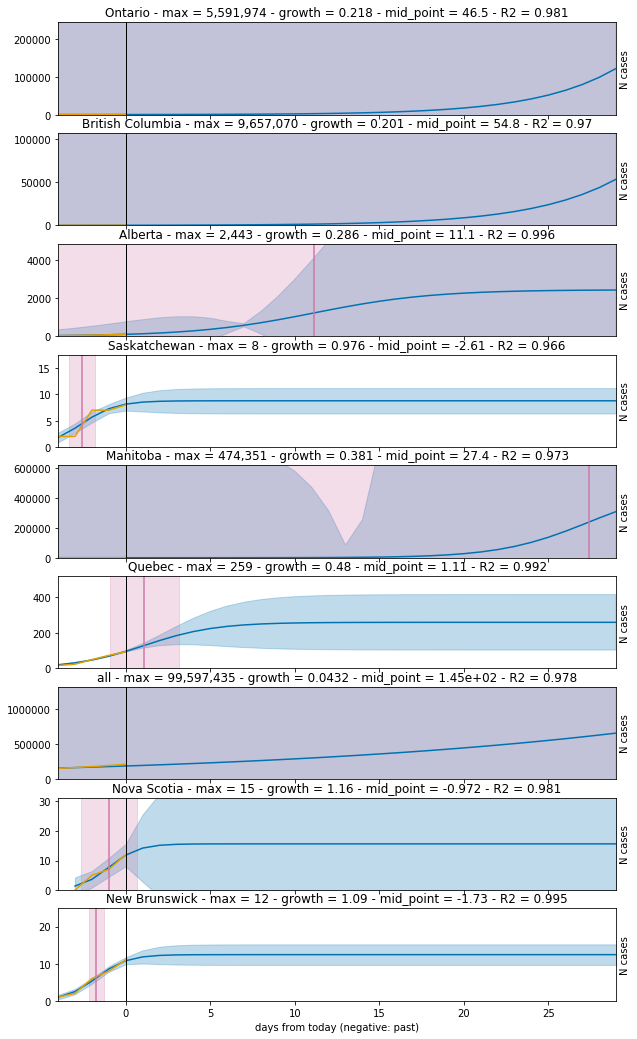

In [5]:
countries = ['Ontario','British Columbia','Alberta','Saskatchewan','Manitoba','Quebec','all','Nova Scotia','New Brunswick']

#countries = provinces

fig,ax = plt.subplots(len(countries),1,sharex='all')
fig.set_size_inches(10,2*len(countries), forward=True)
for i,country in enumerate(countries):
    if country=='all':
        values = df.sum().values[4:]
    else:
        values = df[df['Province/State']==country].sum().values[4:]
    if np.any(np.diff(values>1)):
        start = np.where(np.diff(values>1))[0][0]
    else:
        start = 0
    x=np.arange(-len(values)+1,1)[start:]
    x2=np.arange(-len(values)+1,30)[start:]
    
    values=values[start:]

    f_logistic = lambda x, L, k, x0: L/(1+np.exp(-k*(x-x0)))
    pars = lmfit.Parameters()
    pars.add_many(('L', 5000, True, 0.0, 1e8, None),
                  ('k', 0.1, True, 0, 1e5, None),
                  ('x0', 0, True ,-1e5, 1e5, None))
    gmodel = lmfit.Model(f_logistic)
    out = gmodel.fit(values.astype('float'), x=x, params=pars)
    dely = out.eval_uncertainty(x=x2, sigma=1)
    best=out.eval(x=x2)
    
    ax[i].plot(x2,best,cp[5])
    ax[i].fill_between(x2,best - dely,best + dely,color=cp[5],alpha=0.25)
    ax[i].plot(x,values,cp[1])
    
    ax[i].set_title(country+" - max = " + "{:,}".format(out.params['L'].value.astype('int')) +
                            " - growth = " + "{:0.3}".format(out.params['k'].value)+
                            " - mid_point = " + "{:.3}".format(out.params['x0'].value)+
                            " - R2 = " + "{:.3}".format((1-np.sum(out.residual**2.0)/np.sum(values**2.0))))
    
    ax[i].axvline(x=0,color='k',lw=1)
    ax[i].set_ylim([0,np.max(best)*2.0])
    
    c_err = out.params['x0'].stderr
    c = out.params['x0'].value
    ax[i].axvline(x=c,color=cp[7])
    ax[i].fill_betweenx(ax[i].get_ylim(),c-c_err,c+c_err,color=cp[7],alpha=0.25)
    ax[i].set_xlim([np.min(x2),np.max(x2)])
    ax[i].set_ylabel('N cases')
    ax[i].yaxis.set_label_position("right")
ax[len(ax)-1].set_xlabel('days from today (negative: past)')
#fig.savefig('corona_logistic.png')

/home/weberam2/.local/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in exp


Text(0.5, 0, 'days from today (negative: past)')

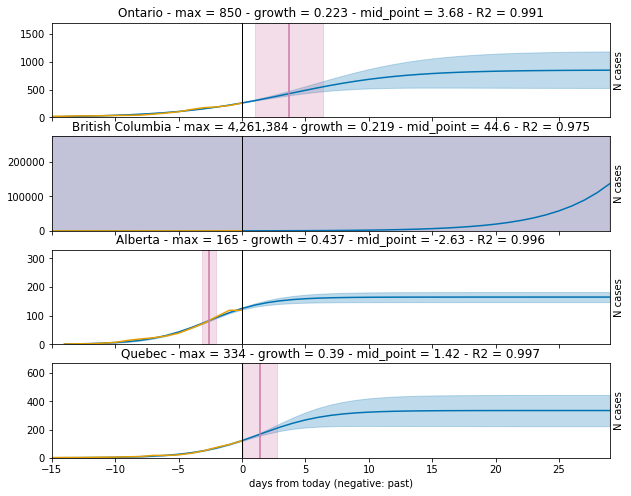

In [12]:
df = pd.read_csv('time_series_19-covid-Confirmed.csv', error_bad_lines=False)

countries = ['Ontario','British Columbia','Alberta','Quebec']

#countries = provinces

fig,ax = plt.subplots(len(countries),1,sharex='all')
fig.set_size_inches(10,2*len(countries), forward=True)
for i,country in enumerate(countries):
    if country=='all':
        values = df.sum().values[4:]
    else:
        values = df[df['Province/State']==country].sum().values[4:]
    if np.any(np.diff(values>1)):
        start = np.where(np.diff(values>1))[0][0]
    else:
        start = 0
    x=np.arange(-len(values)+1,1)[start:]
    x2=np.arange(-len(values)+1,30)[start:]
    
    values=values[start:]

    f_logistic = lambda x, L, k, x0: L/(1+np.exp(-k*(x-x0)))
    pars = lmfit.Parameters()
    pars.add_many(('L', 5000, True, 0.0, 1e8, None),
                  ('k', 0.1, True, 0, 1e5, None),
                  ('x0', 0, True ,-1e5, 1e5, None))
    gmodel = lmfit.Model(f_logistic)
    out = gmodel.fit(values.astype('float'), x=x, params=pars)
    dely = out.eval_uncertainty(x=x2, sigma=1)
    best=out.eval(x=x2)
    
    ax[i].plot(x2,best,cp[5])
    ax[i].fill_between(x2,best - dely,best + dely,color=cp[5],alpha=0.25)
    ax[i].plot(x,values,cp[1])
    
    ax[i].set_title(country+" - max = " + "{:,}".format(out.params['L'].value.astype('int')) +
                            " - growth = " + "{:0.3}".format(out.params['k'].value)+
                            " - mid_point = " + "{:.3}".format(out.params['x0'].value)+
                            " - R2 = " + "{:.3}".format((1-np.sum(out.residual**2.0)/np.sum(values**2.0))))
    
    ax[i].axvline(x=0,color='k',lw=1)
    ax[i].set_ylim([0,np.max(best)*2.0])
    
    c_err = out.params['x0'].stderr
    c = out.params['x0'].value
    ax[i].axvline(x=c,color=cp[7])
    ax[i].fill_betweenx(ax[i].get_ylim(),c-c_err,c+c_err,color=cp[7],alpha=0.25)
    ax[i].set_xlim([np.min(x2),np.max(x2)])
    ax[i].set_ylabel('N cases')
    ax[i].yaxis.set_label_position("right")
ax[len(ax)-1].set_xlabel('days from today (negative: past)')
#fig.savefig('corona_logistic.png')

/home/weberam2/.local/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in exp


Text(0.5, 0, 'days from today (negative: past)')

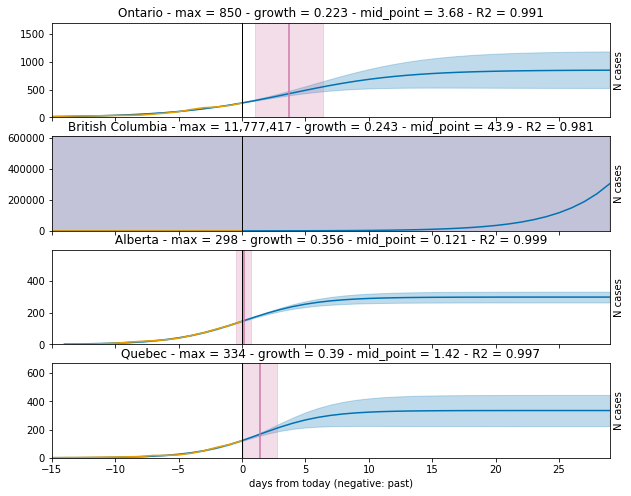

In [16]:
df = pd.read_csv('time_series_19-covid-Confirmed.csv', error_bad_lines=False)

countries = ['Ontario','British Columbia','Alberta','Quebec']

#countries = provinces

fig,ax = plt.subplots(len(countries),1,sharex='all')
fig.set_size_inches(10,2*len(countries), forward=True)
for i,country in enumerate(countries):
    if country=='all':
        values = df.sum().values[4:]
    else:
        values = df[df['Province/State']==country].sum().values[4:]
    if np.any(np.diff(values>1)):
        start = np.where(np.diff(values>1))[0][0]
    else:
        start = 0
    x=np.arange(-len(values)+1,1)[start:]
    x2=np.arange(-len(values)+1,30)[start:]
    
    values=values[start:]

    f_logistic = lambda x, L, k, x0: L/(1+np.exp(-k*(x-x0)))
    pars = lmfit.Parameters()
    pars.add_many(('L', 5000, True, 0.0, 1e8, None),
                  ('k', 0.1, True, 0, 1e5, None),
                  ('x0', 0, True ,-1e5, 1e5, None))
    gmodel = lmfit.Model(f_logistic)
    out = gmodel.fit(values.astype('float'), x=x, params=pars)
    dely = out.eval_uncertainty(x=x2, sigma=1)
    best=out.eval(x=x2)
    
    ax[i].plot(x2,best,cp[5])
    ax[i].fill_between(x2,best - dely,best + dely,color=cp[5],alpha=0.25)
    ax[i].plot(x,values,cp[1])
    
    ax[i].set_title(country+" - max = " + "{:,}".format(out.params['L'].value.astype('int')) +
                            " - growth = " + "{:0.3}".format(out.params['k'].value)+
                            " - mid_point = " + "{:.3}".format(out.params['x0'].value)+
                            " - R2 = " + "{:.3}".format((1-np.sum(out.residual**2.0)/np.sum(values**2.0))))
    
    ax[i].axvline(x=0,color='k',lw=1)
    ax[i].set_ylim([0,np.max(best)*2.0])
    
    c_err = out.params['x0'].stderr
    c = out.params['x0'].value
    ax[i].axvline(x=c,color=cp[7])
    ax[i].fill_betweenx(ax[i].get_ylim(),c-c_err,c+c_err,color=cp[7],alpha=0.25)
    ax[i].set_xlim([np.min(x2),np.max(x2)])
    ax[i].set_ylabel('N cases')
    ax[i].yaxis.set_label_position("right")
ax[len(ax)-1].set_xlabel('days from today (negative: past)')
#fig.savefig('corona_logistic.png')

/home/weberam2/.local/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in exp


Text(0.5, 0, 'days from today (negative: past)')

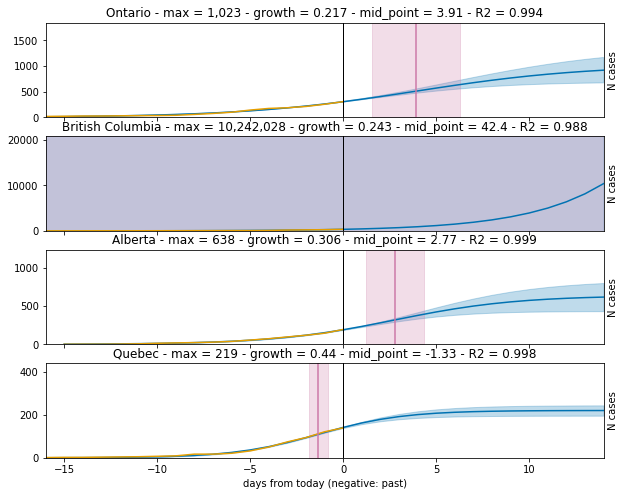

In [19]:
df = pd.read_csv('time_series_19-covid-Confirmed.csv', error_bad_lines=False)

countries = ['Ontario','British Columbia','Alberta','Quebec']

#countries = provinces

fig,ax = plt.subplots(len(countries),1,sharex='all')
fig.set_size_inches(10,2*len(countries), forward=True)
for i,country in enumerate(countries):
    if country=='all':
        values = df.sum().values[4:]
    else:
        values = df[df['Province/State']==country].sum().values[4:]
    if np.any(np.diff(values>1)):
        start = np.where(np.diff(values>1))[0][0]
    else:
        start = 0
    x=np.arange(-len(values)+1,1)[start:]
    x2=np.arange(-len(values)+1,15)[start:]
    
    values=values[start:]

    f_logistic = lambda x, L, k, x0: L/(1+np.exp(-k*(x-x0)))
    pars = lmfit.Parameters()
    pars.add_many(('L', 5000, True, 0.0, 1e8, None),
                  ('k', 0.1, True, 0, 1e5, None),
                  ('x0', 0, True ,-1e5, 1e5, None))
    gmodel = lmfit.Model(f_logistic)
    out = gmodel.fit(values.astype('float'), x=x, params=pars)
    dely = out.eval_uncertainty(x=x2, sigma=1)
    best=out.eval(x=x2)
    
    ax[i].plot(x2,best,cp[5])
    ax[i].fill_between(x2,best - dely,best + dely,color=cp[5],alpha=0.25)
    ax[i].plot(x,values,cp[1])
    
    ax[i].set_title(country+" - max = " + "{:,}".format(out.params['L'].value.astype('int')) +
                            " - growth = " + "{:0.3}".format(out.params['k'].value)+
                            " - mid_point = " + "{:.3}".format(out.params['x0'].value)+
                            " - R2 = " + "{:.3}".format((1-np.sum(out.residual**2.0)/np.sum(values**2.0))))
    
    ax[i].axvline(x=0,color='k',lw=1)
    ax[i].set_ylim([0,np.max(best)*2.0])
    
    c_err = out.params['x0'].stderr
    c = out.params['x0'].value
    ax[i].axvline(x=c,color=cp[7])
    ax[i].fill_betweenx(ax[i].get_ylim(),c-c_err,c+c_err,color=cp[7],alpha=0.25)
    ax[i].set_xlim([np.min(x2),np.max(x2)])
    ax[i].set_ylabel('N cases')
    ax[i].yaxis.set_label_position("right")
ax[len(ax)-1].set_xlabel('days from today (negative: past)')
#fig.savefig('corona_logistic.png')